In [29]:

import imp

# import wind
# imp.reload(wind)
# import wind

import transdist

import roads
imp.reload(roads)
import roads

import pandas as pd
import numpy as np
import geopandas as gpd
import requests
from shapely.geometry import Point
from matplotlib import pyplot as plt
%matplotlib inline
import time

import gmaps
import os
gmaps.configure(api_key=os.environ["GOOGLE_API_KEY"])
import json

print('Libraries loaded.')

Libraries loaded.


# nrel techno sites

In [6]:
nrel_us = pd.read_csv('data/nrel-techno-sites.csv')
print(len(nrel_us))
nrel_ca = nrel_us[(nrel_us.State == 'California')]
print(len(nrel_ca))
point_list = list(zip(nrel_ca['latitude'],nrel_ca['longitude']))
nrel_ca.head()

126692
3932


,site_id,longitude,latitude,State,County,fraction_of_usable_area,power_curve,capacity,wind_speed,capacity_factor,full_timeseries_directory,full_timeseries_path
14960,14960,-114.758820,32.753693,California,Imperial,1.0,3,16,6.36,0.331,29,29/14960.nc
14961,14961,-114.737778,32.757912,California,Imperial,1.0,3,16,6.54,0.346,29,29/14961.nc
15019,15019,-114.784882,32.767143,California,Imperial,1.0,3,16,6.28,0.325,30,30/15019.nc
15020,15020,-114.763840,32.771389,California,Imperial,1.0,3,16,6.51,0.342,30,30/15020.nc
15021,15021,-114.742798,32.775600,California,Imperial,1.0,3,16,6.75,0.362,30,30/15021.nc


# transmission

In [13]:
%time trans_idx_list,trans_point_list,trans_dist_list = list(zip(*[transdist.find_closest_trans_point(latlon) for latlon in point_list[:]]))

CPU times: user 5min 51s, sys: 1.19 s, total: 5min 52s
Wall time: 5min 54s


In [81]:
trans_df = pd.DataFrame({
    'site_id' : nrel_ca['site_id'],
    'trans_idx' : trans_idx_list,
    'latitude' : [latlon[0] for latlon in trans_point_list],
    'longitude': [latlon[1] for latlon in trans_point_list],
    'distance': trans_dist_list
})
trans_df

,site_id,trans_idx,latitude,longitude,distance
14960,14960,21,32.760762,-114.758057,0.489166
14961,14961,21,32.755820,-114.737533,0.144866
15019,15019,21,32.760918,-114.785208,0.429378
15020,15020,21,32.760782,-114.763691,0.730965
15021,15021,788,32.772353,-114.748950,0.422307
...,...,...,...,...,...
105964,105964,807,41.929079,-122.365740,4.953008
106091,106091,882,41.728283,-122.630512,11.365939
106312,106312,851,41.936491,-123.828342,26.184677
106583,106583,882,41.728283,-122.630512,26.690433


(array([2451.,  618.,  430.,  302.,   79.,   27.,   12.,    0.,    5.,
           8.]),
 array([1.00584222e-02, 6.62258571e+00, 1.32351130e+01, 1.98476403e+01,
        2.64601676e+01, 3.30726949e+01, 3.96852221e+01, 4.62977494e+01,
        5.29102767e+01, 5.95228040e+01, 6.61353313e+01]),
 <a list of 10 Patch objects>)

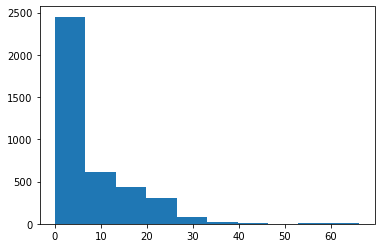

In [21]:
plt.hist(trans_dist_list)

In [11]:
3932/10/60

6.553333333333333

In [19]:
#special gdf = select special transmission lines
transdist.special_gdf.drop('bounds',axis=1).to_file("special_trans_gdf.geojson", driver='GeoJSON')
with open('special_trans_gdf.geojson','r') as f : 
    special_gdf_geojson = json.load(f)
trans_layer = gmaps.geojson_layer(special_gdf_geojson,stroke_color=(0,0,0))

# roads

In [67]:
#find closest roads
#road_coords, road_dists = list(zip(*[roads.get_closest_road(latlon,debug=True) for latlon in grid_point_list[:]]))
#road_data_list = []
#i = 0
while i < len(point_list):
    latlon = point_list[i]
    road_data_list.append((i,) + roads.get_closest_road(latlon,debug=True))
    i = i + 1

10 / 51 valid
54 / 158 valid
1 / 6 valid
1 / 5 valid
1 / 4 valid
3 / 17 valid
27 / 52 valid
4 / 13 valid
18 / 22 valid
31 / 43 valid
5 / 11 valid
15 / 18 valid
33 / 37 valid
8 / 16 valid
1 / 1 valid
13 / 20 valid
16 / 22 valid
1 / 7 valid
0 / 1 valid
0 / 0 valid
15 / 19 valid
15 / 24 valid
0 / 5 valid
0 / 0 valid
0 / 0 valid
1 / 11 valid
0 / 7 valid
10 / 15 valid
14 / 21 valid
0 / 5 valid
0 / 3 valid
2 / 2 valid
0 / 4 valid
0 / 3 valid
21 / 26 valid
19 / 24 valid
3 / 9 valid
1 / 4 valid
0 / 2 valid
1 / 3 valid
1 / 23 valid
5 / 20 valid
1 / 11 valid
1 / 14 valid
0 / 3 valid
0 / 2 valid
0 / 0 valid
11 / 16 valid
0 / 5 valid
0 / 0 valid
0 / 1 valid
3 / 14 valid
0 / 9 valid
0 / 6 valid
0 / 6 valid
1 / 17 valid
1 / 14 valid
0 / 7 valid
0 / 6 valid
1 / 10 valid
0 / 5 valid
0 / 15 valid
1 / 9 valid
1 / 13 valid
1 / 13 valid
0 / 1 valid
1 / 4 valid
0 / 3 valid
9 / 67 valid
0 / 23 valid
0 / 25 valid
2 / 19 valid
0 / 2 valid
0 / 9 valid
4 / 18 valid
0 / 0 valid
0 / 3 valid
0 / 0 valid
1 / 3 vali

3 / 11 valid
4 / 9 valid
7 / 12 valid
1 / 9 valid
10 / 20 valid
4 / 6 valid
1 / 48 valid
4 / 41 valid
0 / 15 valid
1 / 17 valid
3 / 13 valid
0 / 31 valid
3 / 18 valid
4 / 4 valid
2 / 44 valid
0 / 14 valid
1 / 20 valid
15 / 45 valid
11 / 66 valid
8 / 42 valid
0 / 34 valid
0 / 9 valid
0 / 13 valid
9 / 47 valid
4 / 19 valid
5 / 25 valid
1 / 53 valid
1 / 23 valid
1 / 19 valid
0 / 19 valid
0 / 12 valid
0 / 14 valid
0 / 9 valid
8 / 34 valid
0 / 7 valid
2 / 7 valid
4 / 9 valid
0 / 29 valid
5 / 37 valid
3 / 35 valid
0 / 27 valid
1 / 33 valid
0 / 64 valid
0 / 46 valid
0 / 17 valid
0 / 16 valid
0 / 15 valid
10 / 21 valid
0 / 9 valid
5 / 11 valid
1 / 1 valid
3 / 30 valid
4 / 44 valid
0 / 31 valid
2 / 46 valid
12 / 49 valid
0 / 45 valid
0 / 17 valid
0 / 10 valid
0 / 6 valid
0 / 18 valid
18 / 46 valid
2 / 19 valid
0 / 26 valid
1 / 37 valid
0 / 20 valid
0 / 18 valid
8 / 45 valid
4 / 19 valid
0 / 18 valid
1 / 26 valid
9 / 51 valid
2 / 39 valid
0 / 13 valid
0 / 94 valid
1 / 17 valid
0 / 14 valid
0 / 1

2 / 44 valid
2 / 23 valid
23 / 32 valid
5 / 36 valid
3 / 16 valid
2 / 2 valid
8 / 9 valid
5 / 33 valid
1 / 11 valid
0 / 9 valid
2 / 8 valid
1 / 13 valid
4 / 30 valid
3 / 54 valid
0 / 7 valid
3 / 39 valid
7 / 13 valid
1 / 9 valid
0 / 5 valid
7 / 16 valid
4 / 8 valid
0 / 7 valid
6 / 12 valid
0 / 6 valid
1 / 10 valid
2 / 36 valid
0 / 19 valid
2 / 5 valid
16 / 74 valid
1 / 5 valid
1 / 10 valid
39 / 49 valid
95 / 101 valid
2 / 11 valid
7 / 16 valid
0 / 10 valid
2 / 12 valid
0 / 3 valid
8 / 13 valid
2 / 5 valid
0 / 6 valid
5 / 18 valid
1 / 14 valid
1 / 6 valid
0 / 18 valid
1 / 30 valid
0 / 12 valid
0 / 13 valid
0 / 18 valid
2 / 14 valid
7 / 17 valid
0 / 20 valid
2 / 15 valid
19 / 34 valid
63 / 81 valid
6 / 9 valid
3 / 10 valid
11 / 18 valid
10 / 18 valid
8 / 12 valid
1 / 8 valid
3 / 8 valid
7 / 23 valid
4 / 11 valid
2 / 5 valid
0 / 1 valid
2 / 6 valid
3 / 12 valid
1 / 11 valid
3 / 6 valid
3 / 9 valid
1 / 9 valid
1 / 11 valid
2 / 54 valid
1 / 32 valid
1 / 36 valid
0 / 1 valid
3 / 6 valid
2 / 

In [68]:
i

3932

In [69]:
len(road_data_list)

3932

In [71]:
road_df= pd.DataFrame((lambda rlist: {'site_id' : nrel_ca['site_id'].iloc[:len(road_data_list)], 'i' : rlist[0], 'latitude' : [x[0] for x in rlist[1]],
              'longitude' : [x[1] for x in rlist[1]] ,'distance' : rlist[2]})(list(zip(*road_data_list)))
            )
display(road_df)
#froad_df.to_pickle('data/nrel-techno-ca/roads/road0:3932.npy',protocol=3)

,site_id,i,latitude,longitude,distance
14960,14960,0,32.751821,-114.754527,0.281316
14961,14961,1,NaN,NaN,NaN
15019,15019,2,NaN,NaN,NaN
15020,15020,3,32.771727,-114.754347,0.553145
15021,15021,4,32.778704,-114.752256,0.590707
...,...,...,...,...,...
105964,105964,3927,NaN,NaN,NaN
106091,106091,3928,41.811428,-122.819464,0.074799
106312,106312,3929,41.688569,-123.452445,0.311641
106583,106583,3930,NaN,NaN,NaN


/Users/kook/opt/anaconda3/envs/insight_h5py/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/kook/opt/anaconda3/envs/insight_h5py/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([748., 495., 356., 289., 189.,   5.,   1.,   1.,   1.,   2.]),
 array([4.53665934e-04, 1.32470782e-01, 2.64487898e-01, 3.96505014e-01,
        5.28522129e-01, 6.60539245e-01, 7.92556361e-01, 9.24573477e-01,
        1.05659059e+00, 1.18860771e+00, 1.32062482e+00]),
 <a list of 10 Patch objects>)

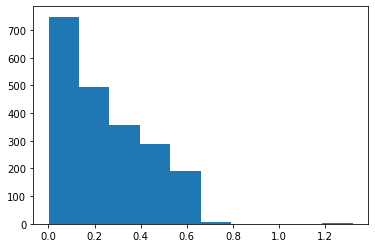

In [73]:
plt.hist(road_df['distance'])

# incorporate model data

In [104]:
import pickle as pkl
with open('models/land-value-model-v1.pkl','rb') as f:
    land_value_model = pkl.load(f)
with open('models/capacity-class-model-v1.pkl','rb') as f:
    capacity_class_model = pkl.load(f)

In [128]:
X_cap = pd.concat([nrel_ca[['site_id','capacity_factor']].set_index('site_id'),
               pd.DataFrame({'p_year' : np.full([len(nrel_ca)],2017)},index=nrel_ca['site_id'])],axis=1)
y_cap = capacity_class_model.predict(X_cap)
print(np.count_nonzero(y_cap),'/',len(y_cap))
capacity_class = y_cap

436 / 3932


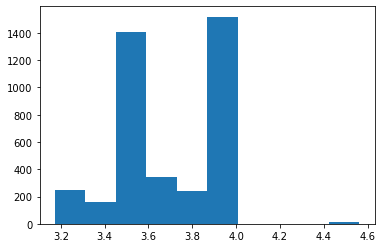

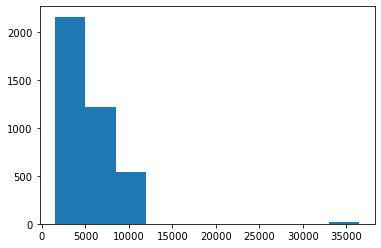

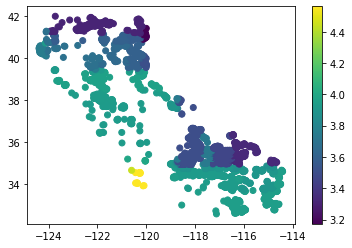

In [125]:
X_land = nrel_ca[['latitude','longitude']]
y_land = land_value_model.predict(X_land)
land_value = 10**y_land
plt.hist(y_land); plt.show()
plt.hist(land_value); plt.show()
plt.scatter(X_land.iloc[:,1],X_land.iloc[:,0],c=y_land); plt.colorbar(); plt.show()

# combine data

In [74]:
nrel_ca.columns

Index(['site_id', 'longitude', 'latitude', 'State', 'County',
       'fraction_of_usable_area', 'power_curve', 'capacity', 'wind_speed',
       'capacity_factor', 'full_timeseries_directory', 'full_timeseries_path'],
      dtype='object')

In [77]:
#make sure all site ids match
np.all((nrel_ca['site_id'] == trans_df['site_id']) & (nrel_ca['site_id'] == road_df['site_id']))

True

In [129]:
nrel_names = 'site_id,latitude,longitude,County,capacity_factor'.split(',')
trans_names = 'site_id,trans_idx,latitude,longitude,distance'.split(',')
road_names = 'site_id,latitude,longitude,distance'.split(',')
df = pd.concat([
    nrel_ca[nrel_names].set_index('site_id'),
    trans_df[trans_names].set_index('site_id'),
    road_df[road_names].set_index('site_id'),
    pd.DataFrame({
        'site_id' : nrel_ca['site_id'], 'land_value' : land_value, 'capacity_class' : capacity_class
    }).set_index('site_id')
],axis=1,keys=['nrel','trans','road','ML'])
df

nrel                                            trans  \
          latitude   longitude     County capacity_factor trans_idx   
site_id                                                               
14960    32.753693 -114.758820   Imperial           0.331        21   
14961    32.757912 -114.737778   Imperial           0.346        21   
15019    32.767143 -114.784882   Imperial           0.325        21   
15020    32.771389 -114.763840   Imperial           0.342        21   
15021    32.775600 -114.742798   Imperial           0.362       788   
...            ...         ...        ...             ...       ...   
105964   41.932537 -122.269745   Siskiyou           0.284       807   
106091   41.810959 -122.820770   Siskiyou           0.143       882   
106312   41.685368 -123.448196   Siskiyou           0.226       851   
106583   41.807388 -123.136169   Siskiyou           0.237       882   
108380   41.986393 -123.725708  Del Norte           0.374       851   

                                                road                        \
          latitude   longitude   distance   latitude   longitude  distance   
site_id                                                                      
14960    32.760762 -114.758057   0.489166  32.751821 -114.754527  0.281316   
14961    32.755820 -114.737533   0.144866        NaN         NaN       NaN   
15019    32.760918 -114.785208   0.429378        NaN         NaN       NaN   
15020    32.760782 -114.763691   0.730965  32.771727 -114.754347  0.553145   
15021    32.772353 -114.748950   0.422307  32.778704 -114.752256  0.590707   
...            ...         ...        ...        ...         ...       ...   
105964   41.929079 -122.365740   4.953008        NaN         NaN       NaN   
106091   41.728283 -122.630512  11.365939  41.811428 -122.819464  0.074799   
106312   41.936491 -123.828342  26.184677  41.688569 -123.452445  0.311641   
106583   41.728283 -122.630512  26.690433        NaN         NaN       NaN   
108380   41.997997 -123.788704   3.340916  41.986440 -123.717957  0.399128   

                  ML                 
          land_value capacity_class  
site_id                              
14960    8857.471976            0.0  
14961    8857.471976            0.0  
15019    8857.471976            0.0  
15020    8857.471976            0.0  
15021    8857.471976            0.0  
...              ...            ...  
105964   2044.604273            0.0  
106091   2044.604273            0.0  
106312   2044.604273            0.0  
106583   2044.604273            0.0  
108380   2044.604273            0.0  

[3932 rows x 13 columns]

In [130]:
clean_df = df.dropna()
len(clean_df)

2087

In [131]:
#fclean_df.to_pickle('app/data/results.pkl',protocol = 3)

In [86]:
np.count_nonzero(np.isnan(df[('road','distance')]))

1845

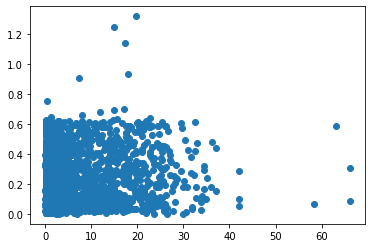

In [84]:
plt.scatter(df[('trans','distance')],df['road','distance'])

In [92]:
point_layer,trans_point_layer,road_point_layer = [
    gmaps.symbol_layer(
        list(zip(clean_df[(cat,'latitude')],clean_df[(cat,'longitude')]))[::100],
        fill_color=color, stroke_color=color, scale=2
    ) for cat,color in zip(['nrel','trans','road'],['red','purple','blue'])]

In [93]:
fig = gmaps.figure(
    layout={
        'width': '800px',
        'height': '600px',
    })
fig.add_layer(trans_layer)
fig.add_layer(point_layer)
fig.add_layer(trans_point_layer)
fig.add_layer(road_point_layer)
fig

Figure(layout=FigureLayout(height='600px', width='800px'))